In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder 


In [2]:
df=pd.read_excel("df_final_No_null_values_ML.xlsx")

In [3]:
df.head(50)

,Serial_No,trans_date_time,cc_num,Merchant_Name,Merchant_Category,Trans_Amt,Trans_Amt_Range,Trans_Amt_Range_Final,first,last,...,Merch_Location_Country_rename,Merch_Location_Country_rename_remove,Merch_Location_Country_rename_remove_for_VALUE_COPY,Merch_Location_Country_rename_remove_for_VALUE_COPY_BACKUP,Merch_Location_Country_rename_State_rename_remove_for,State_with_space_and_formula,State_with_space_and_formula_no_for,State_without_space_and_formula_for,Mer State,Mer Country
0,1,2020-09-11 19:54:15,4956830000000000000,fraud_Labadie LLC,personal_care,52.63,50 to 100 USD Fraud,50 to 100 USD Fraud,Kenneth,Robinson,...,"Catfish Loop, Town of Putnam Valley, Town of P...","Catfish Loop, Town of Putnam Valley, Town of P...","Catfish Loop, Town of Putnam Valley, Town of P...","Catfish Loop, Town of Putnam Valley, Town of P...","Catfish Loop, Town of Putnam Valley, Town of P...","NY,",NY,NY,NY,USA
1,2,2020-07-11 07:55:53,2222000000000000,fraud_Ledner-Pfannerstill,gas_transport,33.26,10 to 50 USD Fraud,10 to 50 USD Fraud,Susan,Hernandez,...,"Broadway Street, Standard City, Macoupin Count...","Broadway Street, Standard City, Macoupin Count...","Broadway Street, Standard City, Macoupin Count...","Broadway Street, Standard City, Macoupin Count...","Broadway Street, Standard City, Macoupin Count...","IL,",IL,IL,IL,USA
2,3,2020-11-23 12:57:10,6540980000000000,fraud_Romaguera Ltd,health_fitness,3.33,1 to 5 USD Fraud,1 to 5 USD Fraud,Bryan,Torres,...,"Rockwood Drive, Brownstown Charter Township, W...","Rockwood Drive, Brownstown Charter Township, W...","Rockwood Drive, Brownstown Charter Township, W...","Rockwood Drive, Brownstown Charter Township, W...","Rockwood Drive, Brownstown Charter Township, W...","MI,",MI,MI,MI,USA
3,4,2020-06-26 13:35:11,4537000000000000000,"fraud_Daugherty, Pouros and Beahan",shopping_pos,6.12,5 to 10 USD Fraud,5 to 10 USD Fraud,Nathan,Mendoza,...,"County Road 297, Placitas, Rio Arriba County, ...","County Road 297, Placitas, Rio Arriba County, ...","County Road 297, Placitas, Rio Arriba County, ...","County Road 297, Placitas, Rio Arriba County, ...","County Road , Placitas, Rio Arriba County, NM,","NM,",NM,NM,NM,USA
4,5,2020-08-02 00:03:27,4092450000000000000,fraud_Cole PLC,grocery_pos,128.18,100 to 250 USD Fraud,100 to 250 USD Fraud,Jeffrey,Vargas,...,"Draper Road, Cumberland County, North Carolina...","Draper Road, Cumberland County, North Carolina...","Draper Road, Cumberland County, North Carolina...","Draper Road, Cumberland County, North Carolina...","Draper Road, Cumberland County, NC,","NC,",NC,NC,NC,USA
5,6,2020-08-25 20:02:19,2356280000000000,fraud_Kirlin and Sons,personal_care,7.13,5 to 10 USD Fraud,5 to 10 USD Fraud,Benjamin,Harris,...,"7302, Hillside Turn, Potomac Estates, Frederic...","7302, Hillside Turn, Potomac Estates, Frederic...","7302, Hillside Turn, Potomac Estates, Frederic...","7302, Hillside Turn, Potomac Estates, Frederic...",", Hillside Turn, Potomac Estates, Frederick Co...","MD,",MD,MD,MD,USA
6,7,2020-09-01 05:58:38,4482430000000000,fraud_Friesen-D'Amore,gas_transport,70.67,50 to 100 USD Fraud,50 to 100 USD Fraud,Leslie,Ford,...,"1387, KY 207, Carter County, Kentucky, 41168, USA","1387, KY 207, Carter County, Kentucky, 41168","1387, KY 207, Carter County, Kentucky, 41168","1387, KY 207, Carter County, Kentucky, 41168",", KY , Carter County, KY,","KY,",KY,KY,KY,USA
7,8,2020-08-24 13:03:38,4873780000000000,"fraud_O'Connell, Botsford and Hand",home,10.15,10 to 50 USD Fraud,10 to 50 USD Fraud,Elizabeth,Maxwell,...,"King County, Washington, USA","King County, Washington","King County, Washington","King County, Washington","King County, WA",", WA",WA,WA,WA,USA
8,9,2020-12-23 10:36:31,4255400000000000000,"fraud_Lehner, Reichert and Mills",misc_pos,33.44,10 to 50 USD Fraud,10 to 50 USD Fraud,George,Smith,...,"County Road 2628, Van Zandt County, Texas, USA","County Road 2628, Van Zandt County, Texas","County Road 2628, Van Zandt County, Texas","County Road 2628, Van Zandt County, Texas","Co

In [4]:
df.tail(50)

,Serial_No,trans_date_time,cc_num,Merchant_Name,Merchant_Category,Trans_Amt,Trans_Amt_Range,Trans_Amt_Range_Final,first,last,...,Merch_Location_Country_rename,Merch_Location_Country_rename_remove,Merch_Location_Country_rename_remove_for_VALUE_COPY,Merch_Location_Country_rename_remove_for_VALUE_COPY_BACKUP,Merch_Location_Country_rename_State_rename_remove_for,State_with_space_and_formula,State_with_space_and_formula_no_for,State_without_space_and_formula_for,Mer State,Mer Country
53949,53950,2020-07-21 23:36:05,4128030000000000,fraud_Little Ltd,kids_pets,135.15,100 to 250 USD Fraud,100 to 250 USD Fraud,Kyle,Park,...,"Archer Road, Athens County, Ohio, 45735, USA","Archer Road, Athens County, Ohio, 45735","Archer Road, Athens County, Ohio, 45735","Archer Road, Athens County, Ohio, 45735","Archer Road, Athens County, NH,","NH,",NH,NH,NH,USA
53950,53951,2020-07-03 20:57:26,6011370000000000,fraud_Fisher Inc,shopping_net,15.94,10 to 50 USD Fraud,10 to 50 USD Fraud,Tammy,Ayers,...,"Fresno Road Northwest, Harrison Township, Carr...","Fresno Road Northwest, Harrison Township, Carr...","Fresno Road Northwest, Harrison Township, Carr...","Fresno Road Northwest, Harrison Township, Carr...","Fresno Road Northwest, Harrison Township, Carr...","NH,",NH,NH,NH,USA
53951,53952,2020-10-02 14:05:05,346273000000000,fraud_Quitzon-Goyette,home,76.81,50 to 100 USD Fraud,50 to 100 USD Fraud,Donna,Moreno,...,"Webster County, West Virginia, USA","Webster County, West Virginia","Webster County, West Virginia","Webster County, West Virginia","Webster County, , WV",", WV",WV,WV,WV,USA
53952,53953,2020-11-10 11:48:27,2252060000000000,"fraud_Willms, Kris and Bergnaum",shopping_pos,125.94,100 to 250 USD Fraud,100 to 250 USD Fraud,Jason,Hernandez,...,"East Mill, Town of Northfield, Jackson County,...","East Mill, Town of Northfield, Jackson County,...","East Mill, Town of Northfield, Jackson County,...","East Mill, Town of Northfield, Jackson County,...","East Mill, Town of Northfield, Jackson County,...","WI,",WI,WI,WI,USA
53953,53954,2020-06-30 18:20:15,4048510000000000,fraud_Brown Inc,kids_pets,158.41,100 to 250 USD Fraud,100 to 250 USD Fraud,Cheryl,Melton,...,"Howard County, Nebraska, USA","Howard County, Nebraska","Howard County, Nebraska","Howard County, Nebraska","Howard County, NE",", NE",NE,NE,NE,USA
53954,53955,2020-11-26 16:29:27,3504180000000000,"fraud_Boehm, Block and Jakubowski",misc_pos,8.77,5 to 10 USD Fraud,5 to 10 USD Fraud,Drew,Garcia,...,"Swan Road, Wood County, Ohio, 43450, USA","Swan Road, Wood County, Ohio, 43450","Swan Road, Wood County, Ohio, 43450","Swan Road, Wood County, Ohio, 43450","Swan Road, Wood County, NH,","NH,",NH,NH,NH,USA
53955,53956,2020-10-21 15:27:37,375849000000000,"fraud_Hyatt, Russel and Gleichner",health_fitness,76.50,50 to 100 USD Fraud,50 to 100 USD Fraud,Dale,Smith,...,"Flying V Ranch, San Saba County, Texas, USA","Flying V Ranch, San Saba County, Texas","Flying V Ranch, San Saba County, Texas","Flying V Ranch, San Saba County, Texas","Flying V Ranch, San Saba County, TX",", TX",TX,TX,TX,USA
53956,53957,2020-12-29 06:39:47,348790000000000,fraud_Kris-Padberg,shopping_pos,6.77,5 to 10 USD Fraud,5 to 10 USD Fraud,Megan,Murphy,...,"Road 3300, Nuckolls County, Nebraska, USA","Road 3300, Nuckolls County, Nebraska","Road 3300, Nuckolls County, Nebraska","Road 3300, Nuckolls County, Nebraska","Road , Nuckolls County, NE",", NE",NE,NE,NE,USA
53957,53958,2020-06-25 08:50:36,4384910000000000,fraud_Koepp-Witting,grocery_pos,70.00,50 to 100 USD Fraud,50 to 100 USD Fraud,Michelle,Russell,...,"14413, 350th Street, Otter Tail County, Minnes...","14413, 350th Street, Otter Tail County, Minnes...","14413, 350th Street, Otter Tail County, Minnes...","14413, 350th Street, Otter Tail County, Minnes...",", th Street, Otter Tail County,MN,","MN,",MN,MN,MN,USA
53958,53959,2020-11-03 14:57:53,30270400000000,fraud_Padberg-Rogahn,entertainment,47.73,10 to 50 USD Fraud,10 to 50 USD Fraud,Lisa,Lin,...,"North 1750th Road, McDonough County, Ill

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53999 entries, 0 to 53998
Data columns (total 49 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Serial_No                                                   53999 non-null  int64         
 1   trans_date_time                                             53999 non-null  datetime64[ns]
 2   cc_num                                                      53999 non-null  int64         
 3   Merchant_Name                                               53999 non-null  object        
 4   Merchant_Category                                           53999 non-null  object        
 5   Trans_Amt                                                   53999 non-null  float64       
 6   Trans_Amt_Range                                             53999 non-null  object        
 7   Trans_Amt_Range_Final 

In [6]:
df["CCH_Name"]=df["first"]+df["last"]

In [7]:


df101=df.drop(["Trans_Amt_Range","Trans_Amt_Range_Final","Age_CHH","Age_CHH_Range","Fraud_time","Fraud_time_range","Merch_Location","Merch_Location_Country_rename","Merch_Location_Country_rename_remove","Merch_Location_Country_rename_remove_for_VALUE_COPY","Merch_Location_Country_rename_remove_for_VALUE_COPY_BACKUP","Merch_Location_Country_rename_State_rename_remove_for","State_with_space_and_formula","State_with_space_and_formula_no_for","State_without_space_and_formula_for","Fraud_time","Fraud_time_range","first","last",'CCH_Name',"Merch_Loc","Age_CHH.1","trans_date_time","Time"],axis=1)

In [8]:

df101.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53999 entries, 0 to 53998
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Serial_No          53999 non-null  int64         
 1   cc_num             53999 non-null  int64         
 2   Merchant_Name      53999 non-null  object        
 3   Merchant_Category  53999 non-null  object        
 4   Trans_Amt          53999 non-null  float64       
 5   Gender_Of_CCH      53999 non-null  object        
 6   Street_Of_CCH      53999 non-null  object        
 7   City_Of_CCH        53999 non-null  object        
 8   State_Of_CCH       53999 non-null  object        
 9   Zip_Of_CCH         53999 non-null  int64         
 10  Lat_Of_CCH         53999 non-null  float64       
 11  long               53999 non-null  float64       
 12  city_pop           53999 non-null  int64         
 13  Job_Of_CCH         53999 non-null  object        
 14  dob_Of

In [9]:
# Converting type of columns to category 
df101['Merchant_Name'] = df101['Merchant_Name'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Merchant_Name_new'] = df101['Merchant_Name'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Merchant_Name_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [10]:
# Converting type of columns to category 
df101['Merchant_Category'] = df101['Merchant_Category'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Merchant_Category_new'] = df101['Merchant_Category'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Merchant_Category_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [11]:
# Converting type of columns to category 
df101['Gender_Of_CCH'] = df101['Gender_Of_CCH'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Gender_Of_CCH_new'] = df101['Gender_Of_CCH'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Gender_Of_CCH_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [12]:
# Converting type of columns to category 
df101['Street_Of_CCH'] = df101['Street_Of_CCH'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Street_Of_CCH_new'] = df101['Street_Of_CCH'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Street_Of_CCH_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [13]:
# Converting type of columns to category 
df101['City_Of_CCH'] = df101['City_Of_CCH'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['City_Of_CCH_new'] = df101['City_Of_CCH'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['City_Of_CCH_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [14]:
# Converting type of columns to category 
df101['State_Of_CCH'] = df101['State_Of_CCH'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['State_Of_CCH_new'] = df101['State_Of_CCH'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['State_Of_CCH_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [15]:
# Converting type of columns to category 
df101['Job_Of_CCH'] = df101['Job_Of_CCH'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Job_Of_CCH_new'] = df101['Job_Of_CCH'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Job_Of_CCH_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [16]:
# Converting type of columns to category 
df101['Name_of_CCH'] = df101['Name_of_CCH'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Name_of_CCH_new'] = df101['Name_of_CCH'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Name_of_CCH_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [17]:
# Converting type of columns to category 
df101['Mer State'] = df101['Mer State'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Mer State_new'] = df101['Mer State'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Mer State_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [18]:
# Converting type of columns to category 
df101['Mer Country'] = df101['Mer Country'].astype('category') 

  
  
# Assigning numerical values and storing it in another columns 
df101['Mer Country_new'] = df101['Mer Country'].cat.codes 

  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    df101[['Mer Country_new']]).toarray()) 
  
# Merge with main 
New_df = df101.join(enc_data) 
  
print(New_df) 

#trans_num

       Serial_No               cc_num                        Merchant_Name  \
0              1  4956830000000000000                    fraud_Labadie LLC   
1              2     2222000000000000            fraud_Ledner-Pfannerstill   
2              3     6540980000000000                  fraud_Romaguera Ltd   
3              4  4537000000000000000   fraud_Daugherty, Pouros and Beahan   
4              5  4092450000000000000                       fraud_Cole PLC   
...          ...                  ...                                  ...   
53994      53995         571465000000                 fraud_Gottlieb Group   
53995      53996      370819000000000                      fraud_Bins-Rice   
53996      53997       30150700000000  fraud_Nienow, Ankunding and Collier   
53997      53998     4099710000000000               fraud_Rippin-VonRueden   
53998      53999       30026800000000                    fraud_Huels-Nolan   

      Merchant_Category  Trans_Amt Gender_Of_CCH  \
0         p

In [19]:


df1=df101.drop(['trans_num','Merchant_Name','Merchant_Category','Gender_Of_CCH','Street_Of_CCH','City_Of_CCH','State_Of_CCH','Job_Of_CCH','Name_of_CCH','Mer State','Mer Country',"dob_Of_CCH","Date"],axis=1)

In [20]:
df1[df1.duplicated()]

,Serial_No,cc_num,Trans_Amt,Zip_Of_CCH,Lat_Of_CCH,long,city_pop,unix_time,merch_lat,merch_long,...,Merchant_Name_new,Merchant_Category_new,Gender_Of_CCH_new,Street_Of_CCH_new,City_Of_CCH_new,State_Of_CCH_new,Job_Of_CCH_new,Name_of_CCH_new,Mer State_new,Mer Country_new


In [21]:
df1.head()

,Serial_No,cc_num,Trans_Amt,Zip_Of_CCH,Lat_Of_CCH,long,city_pop,unix_time,merch_lat,merch_long,...,Merchant_Name_new,Merchant_Category_new,Gender_Of_CCH_new,Street_Of_CCH_new,City_Of_CCH_new,State_Of_CCH_new,Job_Of_CCH_new,Name_of_CCH_new,Mer State_new,Mer Country_new
0,1,4956830000000000000,52.63,7208,40.6747,-74.2239,124967,1378929255,41.414100,-73.892729,...,366,10,1,253,230,30,307,506,36,3
1,2,2222000000000000,33.26,62067,38.9318,-89.9618,2401,1373529353,39.343568,-89.792304,...,381,2,0,204,499,13,52,825,15,3
2,3,6540980000000000,3.33,48221,42.4260,-83.1500,673342,1385211430,42.064747,-83.199991,...,526,5,1,136,200,21,386,123,23,3
3,4,4537000000000000000,6.12,87533,35.9866,-106.0654,18408,1372253711,36.453583,-106.443129,...,127,12,1,719,238,31,217,675,34,3
4,5,4092450000000000000,128.18,28423,34.3091,-78.3372,2290,1375401807,35.035905,-78.829012,...,94,4,1,457,77,26,149,384,29,3


       Serial_No               cc_num  Trans_Amt  Zip_Of_CCH  Lat_Of_CCH  \
0              1  4956830000000000000      52.63        7208     40.6747   
1              2     2222000000000000      33.26       62067     38.9318   
2              3     6540980000000000       3.33       48221     42.4260   
3              4  4537000000000000000       6.12       87533     35.9866   
4              5  4092450000000000000     128.18       28423     34.3091   
...          ...                  ...        ...         ...         ...   
53994      53995         571465000000      55.77       82514     43.0048   
53995      53996      370819000000000      61.11       15557     39.9373   
53996      53997       30150700000000       2.88       35764     34.7031   
53997      53998     4099710000000000      35.87       22968     38.2586   
53998      53999       30026800000000      67.41       39113     32.9013   

           long  city_pop   unix_time  merch_lat  merch_long  ...  \
0      -74.2239   

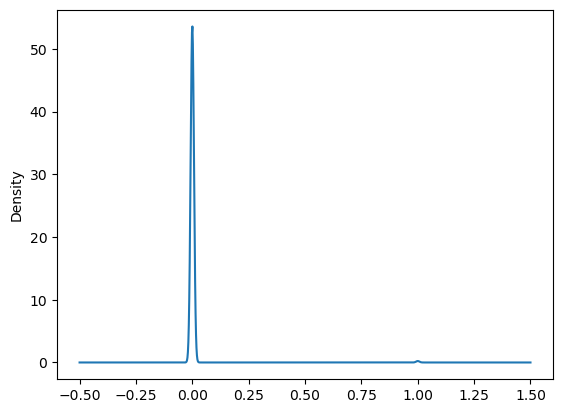

In [22]:
# Plot distribution of values in Marks column
df1['is_fraud'].plot(kind='kde')
print(df1)

In [23]:
df2=df1.sample(frac=1.0)

In [24]:
df2.shape

(53999, 25)

       Serial_No               cc_num  Trans_Amt  Zip_Of_CCH  Lat_Of_CCH  \
45362      45363     3591920000000000      49.26       32780     28.5697   
11706      11707         630485000000      94.60       93627     36.4992   
5256        5257     4922710000000000       5.04       15665     40.3359   
30475      30476  4428780000000000000      89.76       53186     42.9993   
51395      51396      213157000000000      39.49       91206     34.1556   
...          ...                  ...        ...         ...         ...   
1435        1436        4562830000000       2.57       45331     40.0987   
32975      32976     4951650000000000      92.09       62856     37.9943   
18411      18412     3567880000000000      10.73       13615     44.0577   
14901      14902     3559680000000000     191.13       13367     43.7893   
40099      40100     4302480000000000      88.69       50421     42.8511   

           long  city_pop   unix_time  merch_lat  merch_long  ...  \
45362  -80.8191   

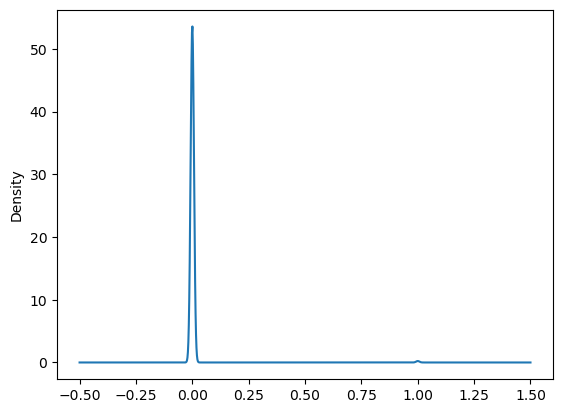

In [25]:
# Plot distribution of values in Marks column
df2['is_fraud'].plot(kind='kde')
print(df2)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53999 entries, 45362 to 40099
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial_No              53999 non-null  int64  
 1   cc_num                 53999 non-null  int64  
 2   Trans_Amt              53999 non-null  float64
 3   Zip_Of_CCH             53999 non-null  int64  
 4   Lat_Of_CCH             53999 non-null  float64
 5   long                   53999 non-null  float64
 6   city_pop               53999 non-null  int64  
 7   unix_time              53999 non-null  int64  
 8   merch_lat              53999 non-null  float64
 9   merch_long             53999 non-null  float64
 10  is_fraud               53999 non-null  int64  
 11  Hour                   53999 non-null  int64  
 12  Minutes                53999 non-null  int64  
 13  Second                 53999 non-null  int64  
 14  Sr.No_of_Merch         53999 non-null  int64  
 15

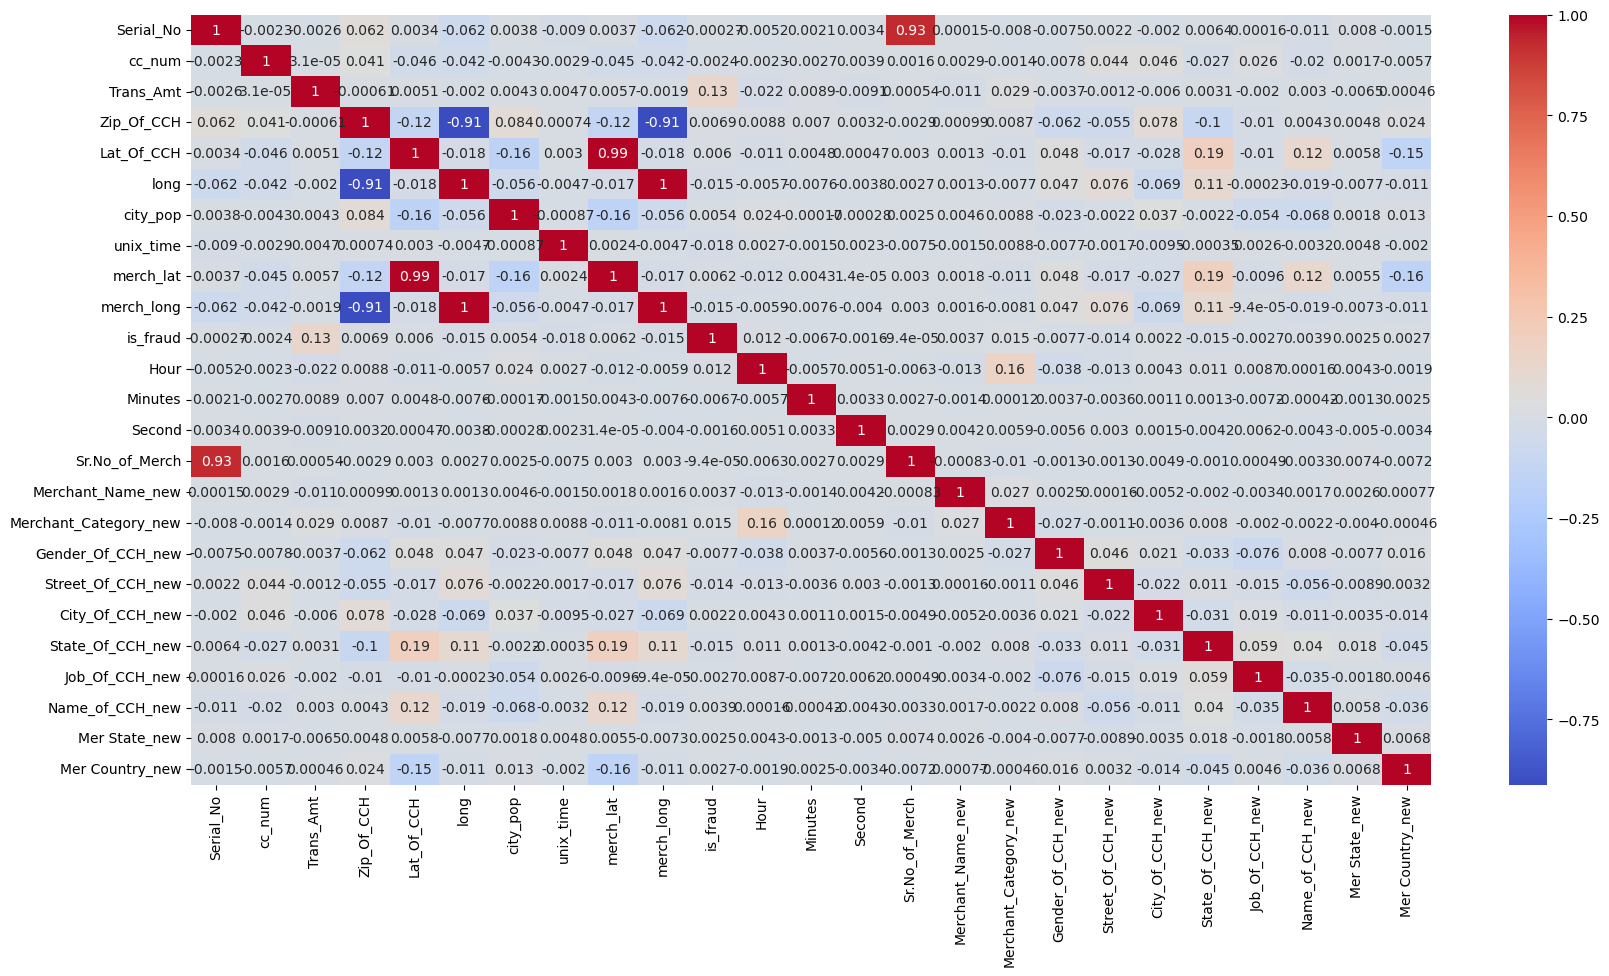

In [27]:
# Finding coorelation between the attribute

corr = df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [28]:
df2.head()

,Serial_No,cc_num,Trans_Amt,Zip_Of_CCH,Lat_Of_CCH,long,city_pop,unix_time,merch_lat,merch_long,...,Merchant_Name_new,Merchant_Category_new,Gender_Of_CCH_new,Street_Of_CCH_new,City_Of_CCH_new,State_Of_CCH_new,Job_Of_CCH_new,Name_of_CCH_new,Mer State_new,Mer Country_new
45362,45363,3591920000000000,49.26,32780,28.5697,-80.8191,54767,1387606920,29.279227,-80.978365,...,51,3,1,318,757,8,406,109,16,3
11706,11707,630485000000,94.60,93627,36.4992,-120.0936,123,1383813952,36.664151,-120.084380,...,415,4,1,754,325,4,130,334,36,3
5256,5257,4922710000000000,5.04,15665,40.3359,-79.6607,1472,1380990550,39.697906,-79.970571,...,74,10,0,643,448,37,362,328,19,3
30475,30476,4428780000000000000,89.76,53186,42.9993,-88.2196,95015,1374022331,43.880614,-87.546551,...,316,1,1,721,794,47,453,727,7,3
51395,51396,213157000000000,39.49,91206,34.1556,-118.2322,172817,1379519523,33.971450,-118.193779,...,526,5,1,678,274,4,11,8,2,3


In [29]:
# determining the name of the file
file_name1 = 'df2.xlsx'
  
# saving the excel
df2.to_excel(file_name1)
#print('DataFrame is written to Excel File successfully.')


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [31]:
# x contain features and y contain label

x = df2.drop(['is_fraud'], axis=1)
y = df2['is_fraud']

In [32]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (37799, 24)
Size of test set: (16200, 24)


In [33]:
# Printing the size of training and testing data set

print("Size of y training set:", y_train.shape)
print("Size of  y test set:", y_test.shape)

Size of y training set: (37799,)
Size of  y test set: (16200,)


In [34]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1], 'kernel': ['linear']},
  
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)


SVC(C=1, kernel='linear')

In [36]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred))


In [39]:
# printing classification_report

print(classification_report(y_test,y_pred,labels=None, target_names=None, sample_weight=None, digits=4))

              precision    recall  f1-score   support

           0     0.9955    1.0000    0.9977     16127
           1     0.0000    0.0000    0.0000        73

    accuracy                         0.9955     16200
   macro avg     0.4977    0.5000    0.4989     16200
weighted avg     0.9910    0.9955    0.9932     16200



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  99.55


In [41]:
# RF

In [42]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation


In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = rf.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9963888888888889


In [47]:
#NB

In [48]:

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 99.6111111111111
